In [1]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import interp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, roc_curve, auc, roc_auc_score, make_scorer, plot_precision_recall_curve

%matplotlib inline

%run utils.py
%run plots.py

/Users/taahase8/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
X, y = load_fraud_data()

In [3]:
# Baseline
print('baseline when predicting 0:', score_evaluation(y, np.zeros(len(y))))
print('baseline when predicting 1:', score_evaluation(y, np.ones(len(y))))
print('predicting with 100% accuracy:', score_evaluation(y, y))

pred_scores = []
for i in range(1, 100):
    y_pred_random = np.random.randint(low=0, high=2, size=len(y))
    pred_scores.append(score_evaluation(y, y_pred_random))
print('random:', np.mean(pred_scores))

baseline when predicting 0: -520
baseline when predicting 1: -43855
predicting with 100% accuracy: 520
random: -22200.757575757576


In [8]:
decision_tree = DecisionTreeClassifier(class_weight='balanced')

parameters = {'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random')}
clf = GridSearchCV(decision_tree,
                   param_grid=parameters,
                   cv=StratifiedKFold(n_splits=5),
                   scoring=make_scorer(score_evaluation))

# some combinations are invalid and would produce noisy warnings
warnings.filterwarnings('ignore')
model = clf.fit(X, y)
warnings.filterwarnings('default')

print('best params', model.best_params_)
print('score', model.score(X, y))

best params {'criterion': 'entropy', 'splitter': 'random'}
score 520


/Users/taahase8/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:415: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_min = np.asscalar(a_min.astype(scaled_dtype))
/Users/taahase8/anaconda3/lib/python3.7/site-packages/matplotlib/image.py:416: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  a_max = np.asscalar(a_max.astype(scaled_dtype))


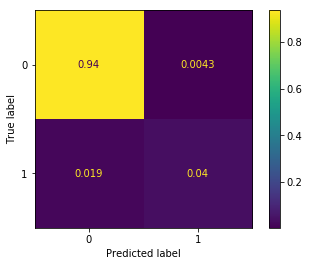

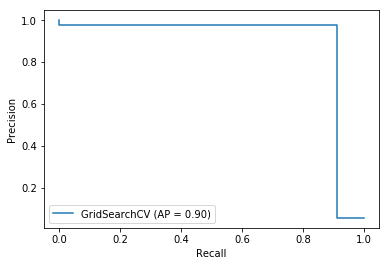

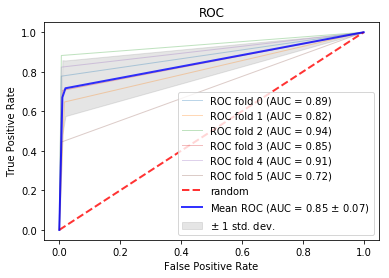

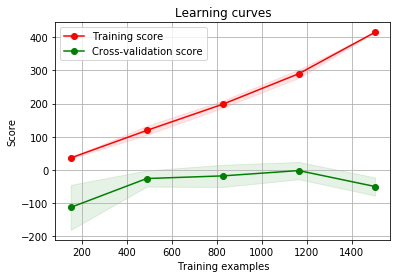

In [9]:
plot_classifier(clf, X, y)

max score: 96.31313131313131
threshold: 0.26


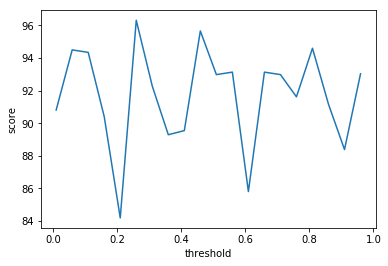

In [10]:
def predictor(X_test):
    return model.predict_proba(X_test)[:,1]

max_score, best_threshold = find_best_thresh(predictor, X, y)

In [11]:
get_test_score(predictor, best_threshold)

-37340